In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from utils.metrics import Results


### Funções auxiliares

In [2]:
def load_metrics(model_name):
    with open(f'metrics/{model_name}_metrics.npy', 'rb') as f:
        acc = np.load(f, allow_pickle=True)
        f1 = np.load(f, allow_pickle=True)
        cm = np.load(f, allow_pickle=True)
        roc = np.load(f, allow_pickle=True)
        # grid_results = np.load(f, allow_pickle=True)
    return acc, f1, cm, roc #, grid_results

In [3]:
def plot_box(dfs, metrics):
    fig, axs = plt.subplots(1, 2, figsize=(8,4))
    for i in [0,1]:
        axs[i].boxplot(dfs[i].values)
        axs[i].set_xticklabels(dfs[i].columns)
        axs[i].set_title(f'{metrics[i]}')
        axs[i].set_xlabel('Modelos')
        axs[i].set_ylabel('Acurácia')

    fig.suptitle('Boxplots Acurácia (10-Fold CV)')
    fig.tight_layout()

    plt.show()

def plot_cms(cm_list, models_name):
    fig, axs = plt.subplots(2, 3, figsize=(16,8))
    # Confusion Matrix
    for idx in range(6):
        cm_mean = np.mean(cm_list[idx], axis=0)
        axs[idx//3, idx%3] = sns.heatmap(cm_mean, linewidths=0.5, annot=True, fmt='g', ax=axs[idx//3, idx%3], cmap = sns.cm.rocket_r)
        axs[idx//3, idx%3].set_yticklabels(axs[idx//3, idx%3].get_yticklabels(), rotation=0)
        axs[idx//3, idx%3].set_title(f'{models_name[idx]}')
        axs[idx//3, idx%3].set_xlabel('Classes preditas')
        axs[idx//3, idx%3].set_ylabel('Classes verdadeiras')

    fig.suptitle('Matrizes de Confusão Média (10-Fold CV)')
    fig.tight_layout()
    
    plt.show()

# Loading...

In [4]:
#DT
dt = load_metrics('dt')
dt_enc = load_metrics('dt_enc')
dt_pca = load_metrics('dt_pca')
dt_fs = load_metrics('dt_fs')
dt_pca_scaled = load_metrics('dt_pca_scaled')
dt_scaled = load_metrics('dt_scaled')
dt_fs_scaled = load_metrics('dt_fs_scaled')

# GNB
gnb = load_metrics('gnb')
gnb_enc = load_metrics('gnb_enc')
gnb_pca = load_metrics('gnb_pca')
gnb_fs = load_metrics('gnb_fs')
gnb_pca_scaled = load_metrics('gnb_pca_scaled')
gnb_scaled = load_metrics('gnb_scaled')
gnb_fs_scaled = load_metrics('gnb_fs_scaled')

#MNB
mnb = load_metrics('mnb')
mnb_enc = load_metrics('mnb_enc')
mnb_fs = load_metrics('mnb_fs')
mnb_pca_scaled = load_metrics('mnb_pca_scaled')
mnb_scaled = load_metrics('mnb_scaled')
mnb_fs_scaled = load_metrics('mnb_fs_scaled')

#KNN
knn = load_metrics('knn')
knn_enc = load_metrics('knn_enc')
knn_pca = load_metrics('knn_pca')
knn_fs = load_metrics('knn_fs')
knn_pca_scaled = load_metrics('knn_pca_scaled')
knn_scaled = load_metrics('knn_scaled')
knn_fs_scaled = load_metrics('knn_fs_scaled')

#SVC
svc = load_metrics('svc')
svc_enc = load_metrics('svc_enc')
svc_pca = load_metrics('svc_pca')
svc_fs = load_metrics('svc_fs')
svc_pca_scaled = load_metrics('svc_pca_scaled')
svc_scaled = load_metrics('svc_scaled')
svc_fs_scaled = load_metrics('svc_fs_scaled')

#MLP
mlp = load_metrics('mlp')
mlp_enc = load_metrics('mlp_enc')
mlp_pca = load_metrics('mlp_pca')
mlp_pca_scaled = load_metrics('mlp_pca_scaled')
mlp_scaled = load_metrics('mlp_scaled')

# Análise dos Modelos

In [ ]:
    'MLP': [mlp[0].mean(), mlp_scaled[0].mean(), mlp_pca[0].mean(), mlp_pca_scaled[0].mean(), mlp_fs[0].mean(), mlp_fs_scaled[0].mean(), mlp_enc[0].mean()],

In [18]:
df_acc = pd.DataFrame({
    'DT': [dt[0].mean(), dt_scaled[0].mean(), dt_pca[0].mean(), dt_pca_scaled[0].mean(), dt_fs[0].mean(), dt_fs_scaled[0].mean(), dt_enc[0].mean()],
    'GNB': [gnb[0].mean(), gnb_scaled[0].mean(), gnb_pca[0].mean(), gnb_pca_scaled[0].mean(), gnb_fs[0].mean(), gnb_fs_scaled[0].mean(), gnb_enc[0].mean()],
    'MNB': [mnb[0].mean(), mnb_scaled[0].mean(), np.nan, mnb_pca_scaled[0].mean(), mnb_fs[0].mean(), mnb_fs_scaled[0].mean(), mnb_enc[0].mean()],
    'KNN': [knn[0].mean(), knn_scaled[0].mean(), knn_pca[0].mean(), knn_pca_scaled[0].mean(), knn_fs[0].mean(), knn_fs_scaled[0].mean(), knn_enc[0].mean()],
    'SVC': [svc[0].mean(), svc_scaled[0].mean(), svc_pca[0].mean(), svc_pca_scaled[0].mean(), svc_fs[0].mean(), svc_fs_scaled[0].mean(), svc_enc[0].mean()],
    'MLP': [mlp[0].mean(), mlp_scaled[0].mean(), mlp_pca[0].mean(), mlp_pca_scaled[0].mean(), np.nan, np.nan, mlp_enc[0].mean()],
}, index=['SPP', 'STDD', 'PCA', 'PCA_STDD', 'FSVT', 'FSVT_STDD', 'ENC'])
df_acc_pca = pd.DataFrame({
    'DT': dt_pca[0],
    'GNB': gnb_pca[0],
    'MNB': mnb_pca_scaled[0],
    'KNN': knn_pca[0],
    'SVC': svc_pca[0],
    'MLP': mlp_pca[0],
})
df_f1 = pd.DataFrame({
    'DT': dt[1],
    'GNB': gnb[1],
    'MNB': mnb[1],
    'KNN': knn[1],
    'SVC': svc[1],
    'MLP': mlp[1],
})

In [19]:
df_acc

,DT,GNB,MNB,KNN,SVC,MLP
SPP,0.744667,0.815333,0.838000,0.928000,0.948444,0.924889
STDD,0.748222,0.682444,0.837111,0.884889,0.939333,0.938889
PCA,0.740667,0.838667,NaN,0.936222,0.952222,0.923111
PCA_STDD,0.730444,0.444444,0.855556,0.907111,0.940444,0.942889
FSVT,0.757778,0.815333,0.838000,0.928000,0.948444,NaN
FSVT_STDD,0.754667,0.682444,0.821111,0.884889,0.939333,NaN
ENC,0.612000,0.808889,0.796222,0.916889,0.913778,0.917333


In [37]:
df_acc.loc['PCA']

<bound method Series.notna of DT     0.740667
GNB    0.838667
MNB         NaN
KNN    0.936222
SVC    0.952222
MLP    0.923111
Name: PCA, dtype: float64>

Text(0, 0.5, 'Padronizado + PCA')

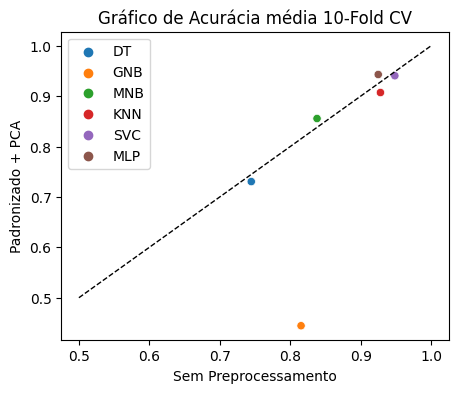

In [34]:
fig, ax = plt.subplots(figsize=(5,4))
sns.scatterplot(x=df_acc.loc['SPP'], y=df_acc.loc['PCA_STDD'], hue=df_acc.columns, ax=ax)
ax.plot([0.5, 1], [0.5, 1], 'k--', lw=1)

ax.set_title('Gráfico de Acurácia média 10-Fold CV')
ax.set_xlabel('Sem Preprocessamento')
ax.set_ylabel('Padronizado + PCA')

# Plots

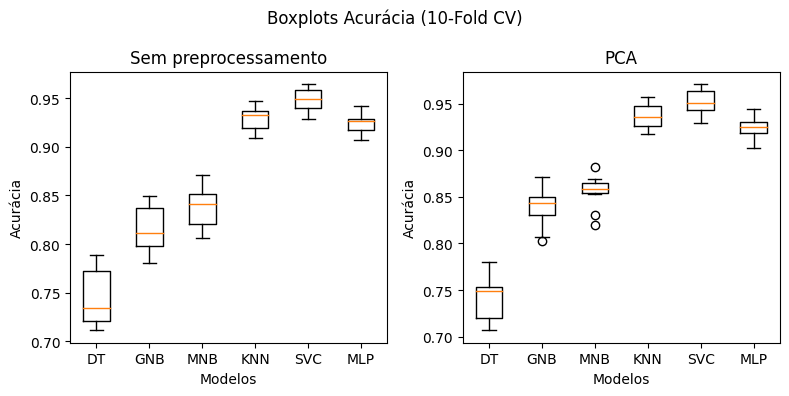

In [6]:
dfs = [df_acc, df_acc_pca]
metrics = ['Sem preprocessamento', 'PCA']

plot_box(dfs, metrics)

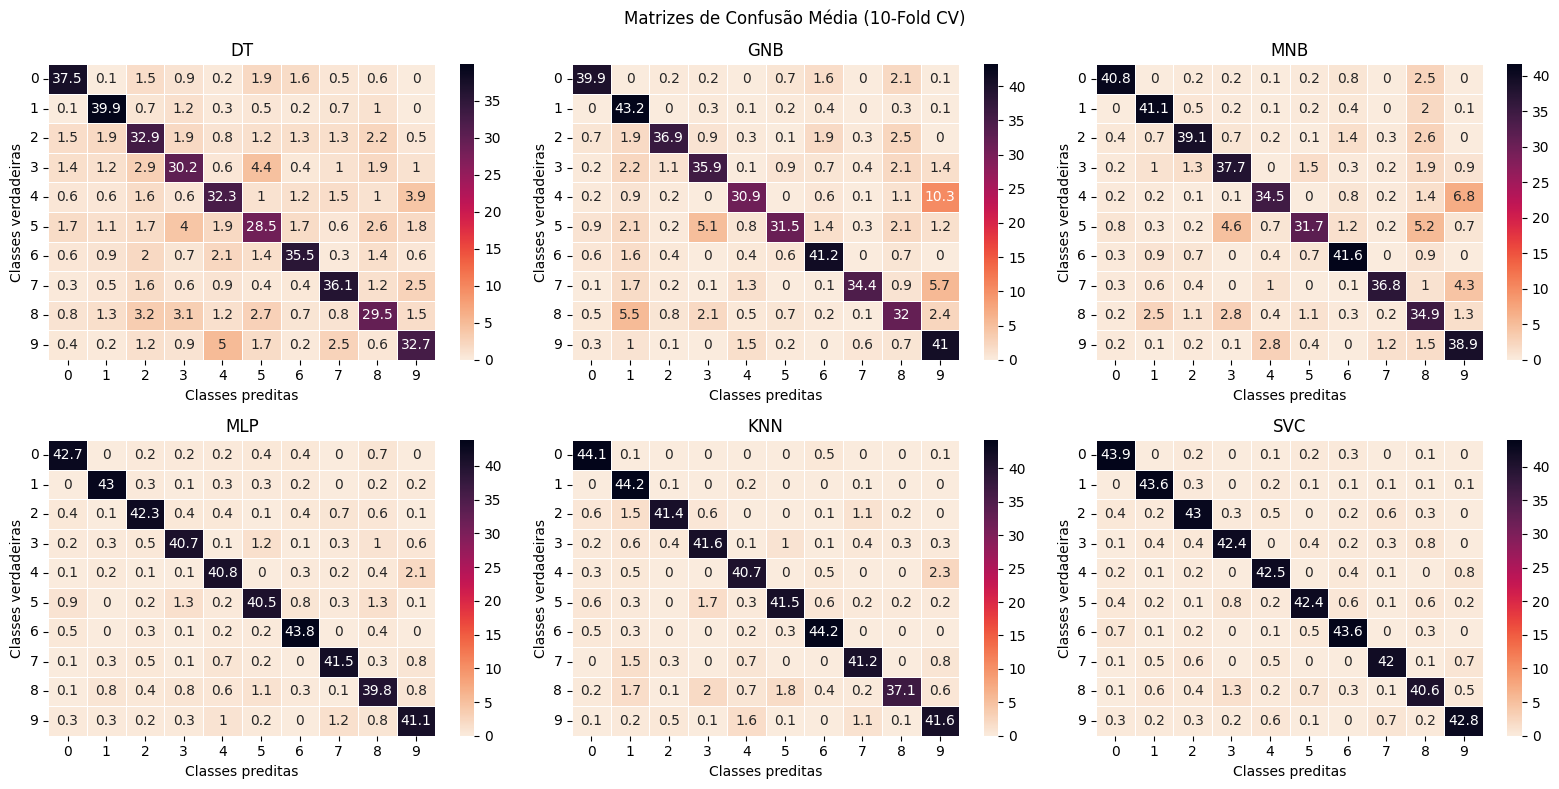

In [7]:
cm_list = [dt[2], gnb[2], mnb[2], mlp[2], knn[2], svc[2]]
models_name = ['DT', 'GNB', 'MNB', 'MLP', 'KNN', 'SVC']
plot_cms(cm_list, models_name)

## Testes de Hipóteses


A seguir faremos testes de normalidade para a distribuição das Acurácias

### Hipóteses:

H0: Os dados seguem uma distribuição Normal

H1: C.C

In [8]:
from scipy import stats

def normality(test, *args):
    for arg in args:
        print(test(arg))
    
print('\nShapiro-Wilk\n')
normality(stats.shapiro, dt_acc, gnb_acc, mnb_acc, mlp_acc, knn_acc, svc_acc)
print('-----------------------------------------------------------------------')
print('\nNormalTeste\n')
normality(stats.normaltest, dt_acc, gnb_acc, mnb_acc, mlp_acc, knn_acc, svc_acc)


Shapiro-Wilk



NameError: name 'dt_acc' is not defined

In [ ]:
print('\nShapiro-Wilk\n')
normality(stats.shapiro, dt_f1, gnb_f1, mnb_f1, mlp_f1, knn_f1, svc_f1)
print('-----------------------------------------------------------------------')
print('\nNormalTeste\n')
normality(stats.normaltest, dt_f1, gnb_f1, mnb_f1, mlp_f1, knn_f1, svc_f1)


Shapiro-Wilk

ShapiroResult(statistic=0.9557310342788696, pvalue=0.7363175749778748)
ShapiroResult(statistic=0.9588919281959534, pvalue=0.7731674313545227)
ShapiroResult(statistic=0.9055513143539429, pvalue=0.25180885195732117)
ShapiroResult(statistic=0.9616227149963379, pvalue=0.8042067885398865)
ShapiroResult(statistic=0.9112376570701599, pvalue=0.28960084915161133)
ShapiroResult(statistic=0.8317874670028687, pvalue=0.035160694271326065)
-----------------------------------------------------------------------

NormalTeste

NormaltestResult(statistic=0.07032472116192653, pvalue=0.9654486527276549)
NormaltestResult(statistic=0.5683393647990886, pvalue=0.7526389242918852)
NormaltestResult(statistic=3.282992886979419, pvalue=0.19368997920510952)
NormaltestResult(statistic=0.2620630941001395, pvalue=0.8771901011944989)
NormaltestResult(statistic=0.9576789637633089, pvalue=0.6195019179943504)
NormaltestResult(statistic=6.07037950737027, pvalue=0.04806554139659742)


Pelos resultados, não conseguimos rejeitar a hipótese nula para nenhum dos conjuntos de acurácia

T-test para comparar as acurácias médias entre os três modelos mais bem sucedidos

In [ ]:
def ttest_multiple_samples(data:dict[str, list]) -> dict:
    from itertools import combinations

    combined_data = dict()
    for combined_key in combinations(data.keys(), 2):
        test_result = stats.ttest_rel(data[combined_key[0]], data[combined_key[1]], alternative='less')
        combined_data[f'{combined_key[0]}_{combined_key[1]}'] = test_result
        
    return combined_data

acc_data = {
    'MLP': mlp_acc,
    'KNN': knn_acc,
    'SVC': svc_acc,
}

test_results = ttest_multiple_samples(data=acc_data)

for result in test_results.keys():
    s = f"Comparação entre a Acurácia dos modelos {result.split('_')[0]} e {result.split('_')[1]}\n\n"
    s += 'H0: As médias das acurácias são iguais\n'
    s += f"H1: A acurácia de {result.split('_')[0]} é menor que a de {result.split('_')[1]}\n"
    s += f'\n {test_results[result]} \n'
    print(s)


Comparação entre a Acurácia dos modelos MLP e KNN

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de KNN

 Ttest_relResult(statistic=-0.11867816581938001, pvalue=0.4540685041373918) 

Comparação entre a Acurácia dos modelos MLP e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de SVC

 Ttest_relResult(statistic=-3.3297483715060885, pvalue=0.004401304495452533) 

Comparação entre a Acurácia dos modelos KNN e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de KNN é menor que a de SVC

 Ttest_relResult(statistic=-3.0616023205910348, pvalue=0.006768253224553435) 



In [ ]:
acc_data = {
    'MLP': mlp_f1,
    'KNN': knn_f1,
    'SVC': svc_f1,
}

test_results = ttest_multiple_samples(data=acc_data)

for result in test_results.keys():
    s = f"Comparação entre F1-Scores dos modelos {result.split('_')[0]} e {result.split('_')[1]}\n\n"
    s += 'H0: As médias das acurácias são iguais\n'
    s += f"H1: A acurácia de {result.split('_')[0]} é menor que a de {result.split('_')[1]}\n"
    s += f'\n {test_results[result]} \n'
    print(s)



Comparação entre F1-Scores dos modelos MLP e KNN

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de KNN

 Ttest_relResult(statistic=-0.0596478507684344, pvalue=0.4768697905233652) 

Comparação entre F1-Scores dos modelos MLP e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de MLP é menor que a de SVC

 Ttest_relResult(statistic=-3.396555717537453, pvalue=0.003958207048708713) 

Comparação entre F1-Scores dos modelos KNN e SVC

H0: As médias das acurácias são iguais
H1: A acurácia de KNN é menor que a de SVC

 Ttest_relResult(statistic=-3.1502062444121064, pvalue=0.005866827594351189) 

